## attribute information

artist_mbid: db92a151-1ac2-438b-bc43-b82e149ddd50
the musicbrainz.org ID for this artists is db9...


artist_mbtags: shape = (4,)
this artist received 4 tags on musicbrainz.org


artist_mbtags_count: shape = (4,)
raw tag count of the 4 tags this artist received on musicbrainz.org


artist_name: Rick Astley
artist name


artist_playmeid: 1338
the ID of that artist on the service playme.com


artist_terms: shape = (12,)
this artist has 12 terms (tags) from The Echo Nest


artist_terms_freq: shape = (12,)
frequency of the 12 terms from The Echo Nest (number between 0 and 1)


artist_terms_weight: shape = (12,)
weight of the 12 terms from The Echo Nest (number between 0 and 1)


audio_md5: bf53f8113508a466cd2d3fda18b06368
hash code of the audio used for the analysis by The Echo Nest


bars_confidence: shape = (99,)
confidence value (between 0 and 1) associated with each bar by The Echo Nest


bars_start: shape = (99,)
start time of each bar according to The Echo Nest, this song has 99 bars


beats_confidence: shape = (397,)
confidence value (between 0 and 1) associated with each beat by The Echo Nest


beats_start: shape = (397,)
start time of each beat according to The Echo Nest, this song has 397 beats


danceability: 0.0
danceability measure of this song according to The Echo Nest (between 0 and 1, 0 => not analyzed)


duration: 211.69587
duration of the track in seconds


end_of_fade_in: 0.139
time of the end of the fade in, at the beginning of the song, according to The Echo Nest


energy: 0.0
energy measure (not in the signal processing sense) according to The Echo Nest (between 0 and 1, 0 => not analyzed)


key: 1
estimation of the key the song is in by The Echo Nest


key_confidence: 0.324
confidence of the key estimation


loudness: -7.75
general loudness of the track


mode: 1
estimation of the mode the song is in by The Echo Nest


mode_confidence: 0.434
confidence of the mode estimation


release: Big Tunes - Back 2 The 80s
album name from which the track was taken, some songs / tracks can come from many albums, we give 
only one


release_7digitalid: 786795
the ID of the release (album) on the service 7digital.com


sections_confidence: shape = (10,)
confidence value (between 0 and 1) associated with each section by The Echo Nest


sections_start: shape = (10,)
start time of each section according to The Echo Nest, this song has 10 sections


segments_confidence: shape = (935,)
confidence value (between 0 and 1) associated with each segment by The Echo Nest


segments_loudness_max: shape = (935,)
max loudness during each segment


segments_loudness_max_time: shape = (935,)
time of the max loudness during each segment


segments_loudness_start: shape = (935,)
loudness at the beginning of each segment


segments_pitches: shape = (935, 12)
chroma features for each segment (normalized so max is 1.)


segments_start: shape = (935,)
start time of each segment (~ musical event, or onset) according to The Echo Nest, this song has 935 segments


segments_timbre: shape = (935, 12)
MFCC-like features for each segment

similar_artists: shape = (100,)
a list of 100 artists (their Echo Nest ID) similar to Rick Astley according to The Echo Nest

song_hotttnesss: 0.864248830588
according to The Echo Nest, when downloaded (in December 2010), this song had a 'hotttnesss' of 0.8 (on a scale of 0 and 1)


song_id: SOCWJDB12A58A776AF
The Echo Nest song ID, note that a song can be associated with many tracks (with very slight audio differences)


start_of_fade_out: 198.536
start time of the fade out, in seconds, at the end of the song, according to The Echo Nest


tatums_confidence: shape = (794,)
confidence value (between 0 and 1) associated with each tatum by The Echo Nest


tatums_start: shape = (794,)
start time of each tatum according to The Echo Nest, this song has 794 tatums


tempo: 113.359
tempo in BPM according to The Echo Nest


time_signature: 4
time signature of the song according to The Echo Nest, i.e. usual number of beats per bar


time_signature_confidence: 0.634
confidence of the time signature estimation


title: Never Gonna Give You Up
song title


track_7digitalid: 8707738
the ID of this song on the service 7digital.com


track_id: TRAXLZU12903D05F94
The Echo Nest ID of this particular track on which the analysis was done


year: 1987
year when this song was released, according to musicbrainz.org

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# useful functions

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    concat_data = np.concatenate((data_1, data_2))

    for i in range(size):
        # Generate permutation sample
        perm_sample = np.random.permutation(concat_data)
        perm_1 = perm_sample[:len(data_1)]
        perm_2 = perm_sample[len(data_1):]

        # Compute the test statistic
        perm_replicates[i] = abs(func(perm_1, perm_2))
        
    return perm_replicates

def p_value(perm_replicates, difference):

    p = np.sum(perm_replicates >= difference) / len(perm_replicates)

    return p

def standard_error(data_1, data_2):

    se = (np.std(data_1)/np.sqrt(len(data_1))) + (np.std(data_2)/np.sqrt(len(data_2)))

    return se

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

#####

# full training set
train = pd.read_csv('C:/Users/jason/Desktop/data_science/songsA.csv')
# training with only latitude/longitude coordinates
train_locations = pd.read_csv('C:/Users/jason/Desktop/data_science/songs_locations.csv')
# training with only artist_locations not blank
artist_locations = pd.read_csv('C:/Users/jason/Desktop/data_science/artist_locations.csv')
# testing set
test = pd.read_csv('C:/Users/jason/Desktop/data_science/songs_test.csv')

In [2]:
# drop latitude and longitude columns 

artist_locations = artist_locations.drop(['artist_latitude', 'artist_longitude'], axis=1)
artist_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 30 columns):
analysis_sample_rate         4217 non-null int64
audio_md5                    4217 non-null object
duration                     4217 non-null float64
end_of_fade_in               4217 non-null float64
key                          4217 non-null int64
key_confidence               4217 non-null float64
loudness                     4217 non-null float64
mode                         4217 non-null int64
mode_confidence              4217 non-null float64
start_of_fade_out            4217 non-null float64
tempo                        4217 non-null float64
time_signature               4217 non-null int64
time_signature_confidence    4217 non-null float64
track_id                     4217 non-null object
artist_7digitalid            4217 non-null int64
artist_familiarity           4217 non-null float64
artist_hotttnesss            4217 non-null float64
artist_id                    4217 non-

In [3]:
# fill nan's in song_hotttnesss with mean

artist_locations['song_hotttnesss'] = artist_locations['song_hotttnesss'].fillna(np.mean(artist_locations['song_hotttnesss']))
artist_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 30 columns):
analysis_sample_rate         4217 non-null int64
audio_md5                    4217 non-null object
duration                     4217 non-null float64
end_of_fade_in               4217 non-null float64
key                          4217 non-null int64
key_confidence               4217 non-null float64
loudness                     4217 non-null float64
mode                         4217 non-null int64
mode_confidence              4217 non-null float64
start_of_fade_out            4217 non-null float64
tempo                        4217 non-null float64
time_signature               4217 non-null int64
time_signature_confidence    4217 non-null float64
track_id                     4217 non-null object
artist_7digitalid            4217 non-null int64
artist_familiarity           4217 non-null float64
artist_hotttnesss            4217 non-null float64
artist_id                    4217 non-

In [4]:
df_numbers = artist_locations.drop(['analysis_sample_rate', 'genre', 'track_id', 'title', 'artist_location',
                           'release', 'artist_name', 'artist_id', 'artist_mbid', 'audio_md5'], axis=1)
#df_numbers.info()

df_chars = artist_locations[['analysis_sample_rate', 'genre', 'song_id', 'track_id', 'title',
                           'release', 'artist_name', 'artist_location', 'artist_mbid', 'audio_md5',
                            'artist_id']]
df_chars = df_chars.set_index('song_id')
# df_chars.info()

data = df_numbers.set_index('song_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4217 entries, SOMZWCG12A8C13C480 to SOBYHQA12AB0185B69
Data columns (total 19 columns):
duration                     4217 non-null float64
end_of_fade_in               4217 non-null float64
key                          4217 non-null int64
key_confidence               4217 non-null float64
loudness                     4217 non-null float64
mode                         4217 non-null int64
mode_confidence              4217 non-null float64
start_of_fade_out            4217 non-null float64
tempo                        4217 non-null float64
time_signature               4217 non-null int64
time_signature_confidence    4217 non-null float64
artist_7digitalid            4217 non-null int64
artist_familiarity           4217 non-null float64
artist_hotttnesss            4217 non-null float64
artist_playmeid              4217 non-null int64
release_7digitalid           4217 non-null int64
song_hotttnesss              4217 non-null float64
track_7digit

now that there are two sets of data, one with numbers and one with objects (strings), do some analysis on each song. - this could be correlation between coefficients, permutation replicates, counts of occurrence for char data, etc. it may be interesting to make your own classes or clusters to test on the testing data.

In [5]:
data['year'] = data['year'].replace(0, np.median(data['year']))
np.mean(data['year'])

1987.552525492056

In [6]:
max(data['year'])
## this dataset is very old, but try to link the song characteristics

2010

In [7]:
len(data[data['year'] >= 2000])

1202

In [8]:
cols = data.columns
list(cols)

['duration',
 'end_of_fade_in',
 'key',
 'key_confidence',
 'loudness',
 'mode',
 'mode_confidence',
 'start_of_fade_out',
 'tempo',
 'time_signature',
 'time_signature_confidence',
 'artist_7digitalid',
 'artist_familiarity',
 'artist_hotttnesss',
 'artist_playmeid',
 'release_7digitalid',
 'song_hotttnesss',
 'track_7digitalid',
 'year']

In [9]:
most_corr = []

for i in cols:
    second_highest = []
    for j in cols:
        r = pearson_r(data[i], data[j])
        print('the correlation of '+i+ ' and '+j+' is ', r)
        second_highest.append((r, j))
        second_highest = sorted(second_highest)
        
    print()    
    print('most correlated variable with '+i+' is ', second_highest[-2])
    print()
    most_corr.append((i, second_highest[-2][1]))
###
most_corr

the correlation of duration and duration is  1.0
the correlation of duration and end_of_fade_in is  0.10593840470793606
the correlation of duration and key is  0.0093644673503931
the correlation of duration and key_confidence is  0.02232065820083577
the correlation of duration and loudness is  0.09582702907459295
the correlation of duration and mode is  -0.06241113972843514
the correlation of duration and mode_confidence is  -0.003476057813551803
the correlation of duration and start_of_fade_out is  0.9984897658735139
the correlation of duration and tempo is  -0.0347120609415935
the correlation of duration and time_signature is  0.1125107034661059
the correlation of duration and time_signature_confidence is  0.10844458031459746
the correlation of duration and artist_7digitalid is  0.030143849664179496
the correlation of duration and artist_familiarity is  0.04628406688811296
the correlation of duration and artist_hotttnesss is  0.027061757994431418
the correlation of duration and artis

the correlation of time_signature and mode is  -0.04659498939988882
the correlation of time_signature and mode_confidence is  -0.06475806575647551
the correlation of time_signature and start_of_fade_out is  0.11231802518542046
the correlation of time_signature and tempo is  0.015123255070514006
the correlation of time_signature and time_signature is  0.9999999999999998
the correlation of time_signature and time_signature_confidence is  0.320842091960229
the correlation of time_signature and artist_7digitalid is  -0.009971400874662695
the correlation of time_signature and artist_familiarity is  0.07026244740314071
the correlation of time_signature and artist_hotttnesss is  0.05072267023596975
the correlation of time_signature and artist_playmeid is  0.010698378646549904
the correlation of time_signature and release_7digitalid is  -0.014500472362110366
the correlation of time_signature and song_hotttnesss is  0.04094051223733031
the correlation of time_signature and track_7digitalid is  

[('duration', 'start_of_fade_out'),
 ('end_of_fade_in', 'duration'),
 ('key', 'loudness'),
 ('key_confidence', 'mode_confidence'),
 ('loudness', 'artist_familiarity'),
 ('mode', 'key_confidence'),
 ('mode_confidence', 'key_confidence'),
 ('start_of_fade_out', 'duration'),
 ('tempo', 'loudness'),
 ('time_signature', 'time_signature_confidence'),
 ('time_signature_confidence', 'time_signature'),
 ('artist_7digitalid', 'release_7digitalid'),
 ('artist_familiarity', 'artist_hotttnesss'),
 ('artist_hotttnesss', 'artist_familiarity'),
 ('artist_playmeid', 'artist_7digitalid'),
 ('release_7digitalid', 'track_7digitalid'),
 ('song_hotttnesss', 'artist_familiarity'),
 ('track_7digitalid', 'release_7digitalid'),
 ('year', 'artist_familiarity')]

from the above output, the most correlated variables are printed at the end of each loop as well as at the end of the loop with the column headers.  the value is the second highest with the original column because the column that is most correlated is itself.

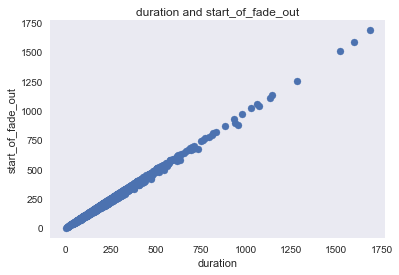

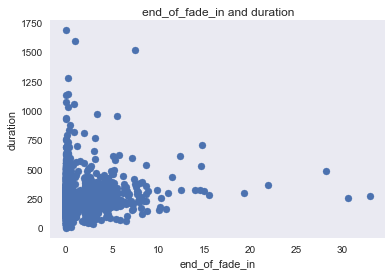

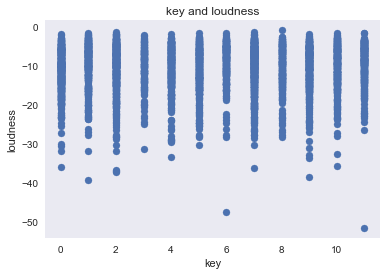

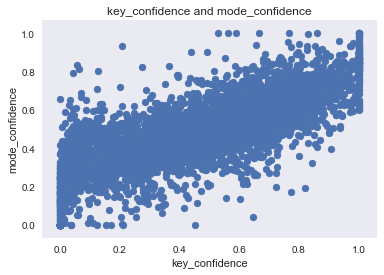

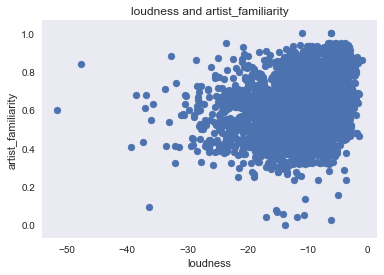

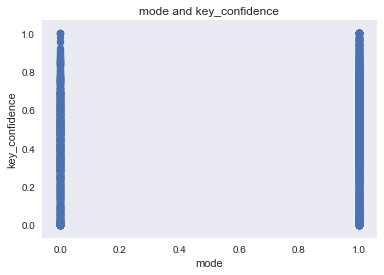

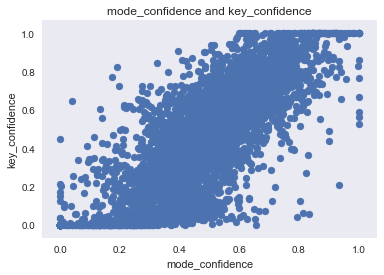

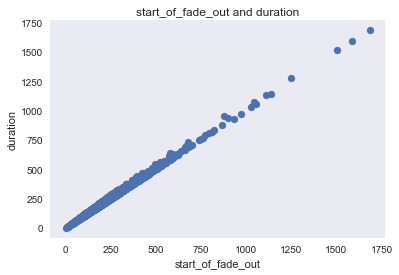

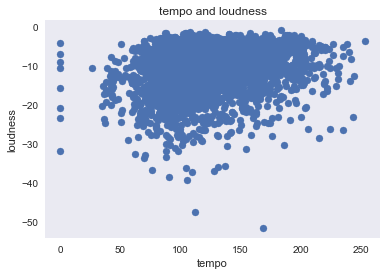

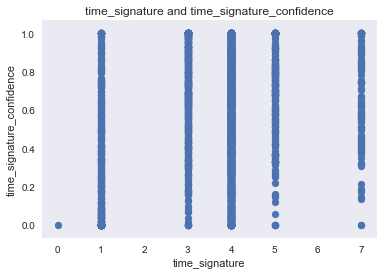

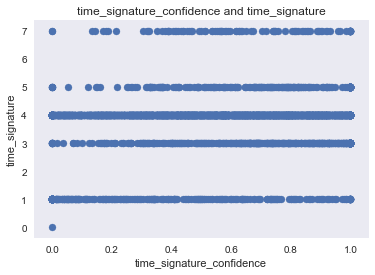

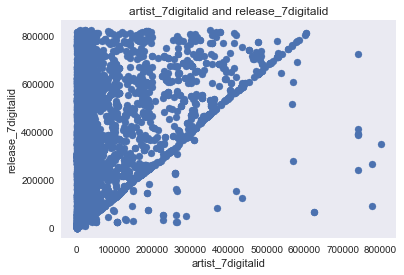

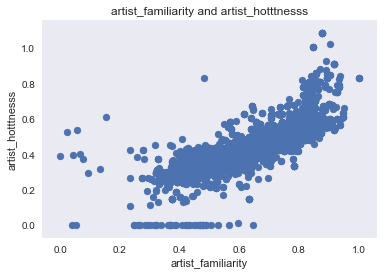

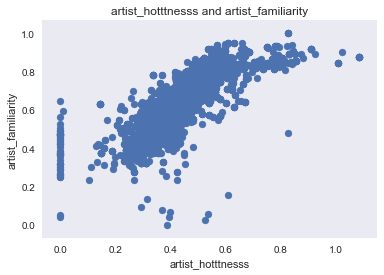

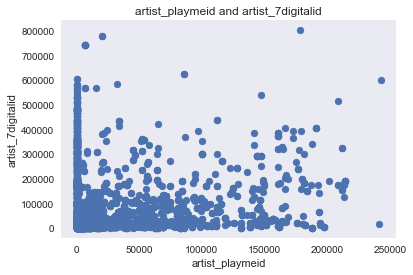

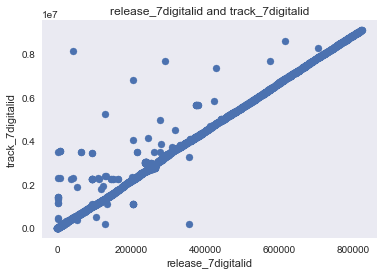

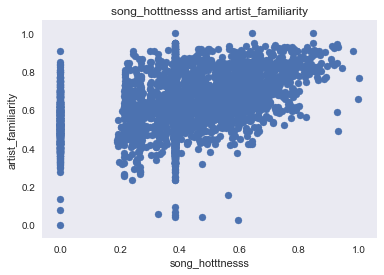

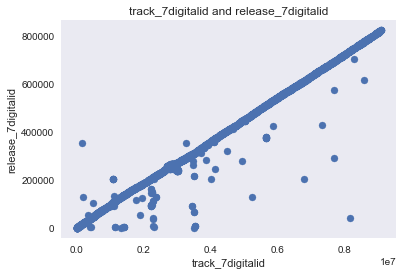

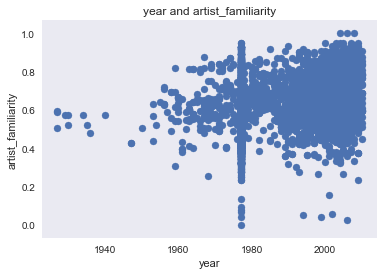

In [11]:
for i, j in most_corr:
    plt.scatter(data[i], data[j])
    plt.title(i+ ' and '+j)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.grid()
    plt.show()

key loudness


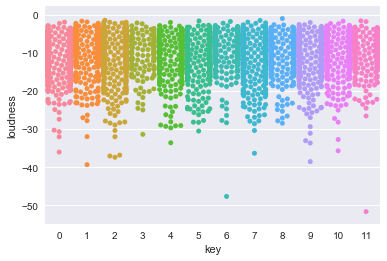

mode key_confidence


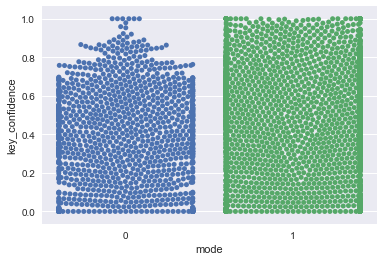

time_signature time_signature_confidence


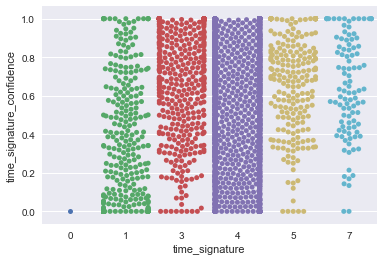

year artist_familiarity


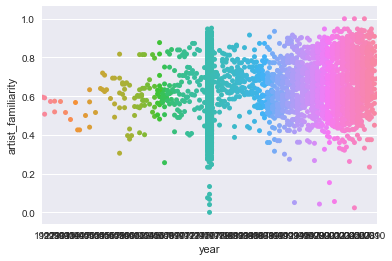

In [17]:
# swarm plot may be helpful for the figures with columns that have
# discrete int values

mat = [('key', 'loudness'), ('mode', 'key_confidence'), 
       ('time_signature', 'time_signature_confidence'), ('year', 'artist_familiarity')]

for i,j in mat:
    print(i,j)
    sns.swarmplot(data[i], data[j])
    plt.show()

all keys are relatively the same loudness. however, the keys with more loud songs (more negative) are 1, 2, 6, 7, 9, 10, and 11. the dataset information does not list which keys they represent (minor/major/etc.).

mode 1 has significantly more 1's as the confidence than mode 0. but what is the mode, Echo Nest?

the most common time signature is 4 (aka 4/4 or 4 quarter notes per measure.. standard) with confidence. from my experience, 1, 3, 5, and 7 are uncommon time signatures. the only variation of these time signatures i have seen is 3/4. none with a 1, 5, or 7 in the numerator.

the more recent the artist, the more familiar they are to the public. the line in the middle is just the median of all years so that i wouldn't have to remove the rows ^_^

now that EDA is complete, let's get to some clustering algorithms!